# This code is to test XGBoosting parameters based on sucessful implementation

Now attempting to play around with parameters to reduce error.

This is done by changing the objective. This has been done for a number of different objectives and then compared. 

Types:
Squared error - regression with squared loss
Squared log error - regression with squared log loss. 
logistic - logistic regression
pseudohubererror - regression with Pseudo Huber loss, a twice differentiable alternative to absolute loss.

For 100 trees: Type, Mean Absolute Error, STD - 7.118
reg:squarederror - 0.375
reg:squaredlogerror - 0.387
reg:pseudohubererror - 0.453

pseudo is worse as it takes greater account of the error which is already quite large.



In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn import datasets


In [123]:
import xgboost as xgb
from xgboost import XGBRegressor

In [124]:
nutrition = pd.read_pickle("/Users/oscarbond/Documents/GitHub/green-team-repo-2/Random forests/OB - Price/Nutrition_Full_Features.pkl")
nutrition = nutrition.dropna()
nutrition

,name,Food Group,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Carbon Group,Land use (m2/100g),GHG(kgco2eq/100g),Water use (L/100g),Acidifying emissions(kgSO2eq per 100g),...,"Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg)
1,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,63.0,4530.0,1445.0,12.0,0.0,7.0,0.0,0.0
2,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,66.0,5292.0,1502.0,13.0,0.0,8.0,0.0,0.0
5,Dutch Apple Pie,Baked Foods,2.80,500.0,0.560000,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,1.0,42.0,5797.0,2117.0,0.0,0.0,0.0,0.0,0.0
9,Bread White Wheat,Baked Foods,0.95,800.0,0.118750,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,25.0,393.0,973.0,3.0,0.0,0.0,0.0,0.0
10,Bagels Wheat,Baked Foods,1.60,450.0,0.355556,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,88.0,290.0,936.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,0.90,85.0,1.058824,Other vegetables,0.0310,0.0455,8.3,0.000531,...,418.0,0.0,29.0,4099.0,4079.0,0.0,0.0,0.0,0.0,0.0
1219,Romaine Lettuce Raw,Vegetables,1.00,400.0,0.250000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,0.0,0.0,4204.0,7.0,126.0,0.0,0.0,0.0,0.0,0.0
1220,Palak Paneer,Vegetables,3.75,500.0,0.750000,Cheese,8.0642,2.1240,473.5,0.014894,...,12.0,313.0,4097.0,2402.0,2112.0,0.0,0.0,0.0,0.0,0.0
1221,Carrots Raw Salad,Vegetables,0.41,1000.0,0.041000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,2157.0,1.0,162.0,3498.0,9319.0,0.0,0.0,1.0,0.0,0.0


In [125]:
# pulling out the features data
X = nutrition.iloc[:, 11:].astype('float64').dropna() 
X

,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Saturated Fats (g),Calcium (mg),"Iron, Fe (mg)","Potassium, K (mg)",...,"Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg)
1,273.0,9.22,6.58,41.05,4.30,2.2,1.898,279.0,6.04,126.0,...,0.0,0.0,63.0,4530.0,1445.0,12.0,0.0,7.0,0.0,0.0
2,309.0,9.49,7.42,48.39,4.41,2.6,2.275,299.0,6.59,138.0,...,0.0,0.0,66.0,5292.0,1502.0,13.0,0.0,8.0,0.0,0.0
5,290.0,11.50,2.17,44.54,22.02,1.6,2.313,14.0,0.91,76.0,...,0.0,1.0,42.0,5797.0,2117.0,0.0,0.0,0.0,0.0,0.0
9,238.0,2.15,10.66,43.91,5.00,9.2,0.630,684.0,4.89,127.0,...,0.0,0.0,25.0,393.0,973.0,3.0,0.0,0.0,0.0,0.0
10,250.0,1.53,10.20,48.89,6.12,4.1,0.000,20.0,2.76,165.0,...,0.0,0.0,88.0,290.0,936.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,241.0,10.16,1.66,40.60,19.10,2.9,1.507,4.0,0.78,572.0,...,418.0,0.0,29.0,4099.0,4079.0,0.0,0.0,0.0,0.0,0.0
1219,19.0,0.27,1.39,3.78,0.71,3.1,0.053,62.0,0.90,327.0,...,0.0,0.0,4204.0,7.0,126.0,0.0,0.0,0.0,0.0,0.0
1220,96.0,6.84,5.23,4.32,1.89,1.2,1.486,70.0,1.15,269.0,...,12.0,313.0,4097.0,2402.0,2112.0,0.0,0.0,0.0,0.0,0.0
1221,208.0,15.70,1.22,17.17,11.23,2.3,2.452,30.0,0.49,309.0,...,2157.0,1.0,162.0,3498.0,9319.0,0.0,0.0,1.0,0.0,0.0


In [126]:
# pulling out the price data
y = nutrition.iloc[:, 4:5].astype('float64').dropna()
y

,Price per Weight (£/100Gram)
1,0.264550
2,0.264550
5,0.560000
9,0.118750
10,0.355556
...,...
1218,1.058824
1219,0.250000
1220,0.750000
1221,0.041000


In [127]:
# flattening the array for use in the random forest algorithm
y = np.ravel(y)
y

array([0.26455027, 0.26455027, 0.56      , ..., 0.75      , 0.041     ,
       0.17142857])

In [139]:
from sklearn.model_selection import train_test_split
X_train_validation, X_test, y_train_validation, y_test = train_test_split(X,y,test_size=0.2)
# splitting the data into train and test data. 
#size =0.2 means 80% data is training data, 20% testing

In [140]:
# splitting the training data into validation and training data. 
X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation,y_train_validation,test_size=0.01)

## Implementing XGBoost model 

In [156]:
# Define the parameters of our gradient boosting ensemble 
model = XGBRegressor(eta = 0.31, n_estimators=5)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.31, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.310000002, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=5, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [157]:
y_pred = model.predict(X_test)

In [158]:
#evaluating the model by checking errors
#generally error decreases slightly as number of trees is increased, converges around 200 trees

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.511533300483924
Mean Squared Error: 0.6887741303258731
Root Mean Squared Error: 0.8299241714312658


In [138]:
print(np.std(y))

7.118726897222426


In [163]:
Mean_Absolute_Error = []
Mean_Squared_Error = []
Root_Mean_Squared_Error = []

In [164]:
# creating a for loop to evaluate the hyperperameters of the model. Initally with n_estimators
#implementing the random forest here
for i in range (1, 1000, 2):
    model = XGBRegressor(objective='reg:squarederror', n_estimators=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    Mean_Absolute_Error.append(mae)
    Mean_Squared_Error.append(mse)
    Root_Mean_Squared_Error.append(rmse)
    

ValueError: x and y must have same first dimension, but have shapes (450,) and (500,)

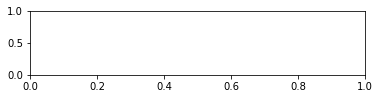

In [165]:
# plotting the different metrics to see the effect of changing the number of trees
import matplotlib.pyplot as plt
n_trees = list(range(100, 1000, 2))

f = plt.figure(1)

plt.subplot(311)
plt.plot(n_trees, Mean_Absolute_Error)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of Trees')
plt.show()
plt.subplot(312)
plt.plot(n_trees, Mean_Squared_Error)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of Trees')
plt.show()
plt.subplot(313)
plt.plot(n_trees, Root_Mean_Squared_Error)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of Trees')
plt.show()